In [1]:
import numpy as np
import h5py
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime

In [2]:
#
'''
ramsfolder = '/sumatra/nfalk/CAMP2EX_forecast-like_simulations/SF16/'
time_chosen = datetime.datetime(2019,9,29,5,45)
main_dir = './SF16/'
ncfile_name = 'CS-TropOce-1000_fig-1-data_v04.nc'
temp_long_name = 'Temperature at lowest model level (50 m)'
T_ref = 26.9+273.15
'''
#

#

ramsfolder = '/sumatra/nfalk/HR/HR_29_600_T12/'
time_chosen = datetime.datetime(2019,9,29,5,45)
main_dir = './HRT12/'
ncfile_name = 'CS-TropOce-100_fig-1-data_v04.nc'
temp_long_name = 'Temperature at lowest model level (25 m)'
T_ref = 27.3+273.15

#

In [3]:
ct_str = time_chosen.strftime("%Y-%m-%d-%H%M%S")
rams_file = h5py.File(ramsfolder+"a-A-{0}-g1.h5".format(ct_str), 'r')
lats = np.array(rams_file['GLAT'])
lons = np.array(rams_file['GLON'])
theta = np.array(rams_file['THETA'][1,:,:])
pi = np.array(rams_file['PI'][1,:,:])/1004
rams_file.close()
temperature = theta*pi

In [4]:
network_file = h5py.File(main_dir+"network_info.h5", 'r')
network_lon = np.array(network_file['network_lon'])
network_lat = np.array(network_file['network_lat'])
network_file.close()

(17.8, 18.2)

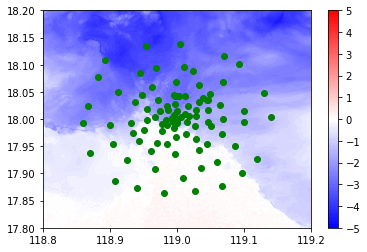

In [5]:
# quick plot for sanity check
plt.contourf(lons,lats,temperature-T_ref,levels=np.linspace(-5,5,100),cmap='bwr')
plt.colorbar(ticks=[-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.scatter(network_lon,network_lat,c='green')
plt.xlim([118.8,119.2])
plt.ylim([17.8,18.2])

In [6]:
try: ncfile.close()
except: pass
ncfile = nc.Dataset(ncfile_name,mode='w',format='NETCDF4')

lon_dim = ncfile.createDimension('longitude_dim', np.shape(lats)[1])

lat_dim = ncfile.createDimension('latitude_dim', np.shape(lats)[0])

station_dim = ncfile.createDimension('station_number', np.shape(network_lat)[0])

time_dim = ncfile.createDimension('time', 1)

time_nc = ncfile.createVariable('time', np.int, ('time'))
time_nc[:] = time_chosen.strftime("%Y%m%d%H%M%S")
time_nc.units = 'Time in format YYYYMMDDHHMMSS'
time_nc.long_name = 'Time'

latitude_nc = ncfile.createVariable('latitude', np.float, ('latitude_dim','longitude_dim'))
latitude_nc[:] = lats
latitude_nc.units = 'degrees_lat'
latitude_nc.long_name = 'Latitude'

longitude_nc = ncfile.createVariable('longitude', np.float, ('latitude_dim','longitude_dim'))
longitude_nc[:] = lons
longitude_nc.units = 'degrees_lon'
longitude_nc.long_name = 'Longitude'

temp_nc = ncfile.createVariable('temperature', np.float, ('latitude_dim','longitude_dim'))
temp_nc[:] = temperature
temp_nc.units = 'K'
temp_nc.long_name = temp_long_name

station_lat_nc = ncfile.createVariable('station_lat', np.float, ('station_number'))
station_lat_nc[:] = network_lat
station_lat_nc.units = 'degrees_lat'
station_lat_nc.long_name = 'Station Latitudes'

station_lon_nc = ncfile.createVariable('station_lon', np.float, ('station_number'))
station_lon_nc[:] = network_lon
station_lon_nc.units = 'degrees_lon'
station_lon_nc.long_name = 'Station Longitudes'

T_ref_nc = ncfile.createVariable('T_ref', np.float, ('time'))
T_ref_nc[:] = T_ref
T_ref_nc.units = 'K'
T_ref_nc.long_name = 'Reference Temperature'

ncfile.close()